### Brown Corpus

The Brown Corpus was the first million-word electronic corpus of English, created in 1961 at Brown University. This corpus contains text from 500 sources, and the sources have been categorized by genre, such as news, editorial, and so on. 1.1 gives an example of each genre (for a complete list, see http://icame.uib.no/brown/bcm-los.html).

In [1]:
from nltk.corpus import brown

In [3]:
# We can access the corpus as a list of words, or a list of sentences (where each sentence is itself just a list of words). 
#We can optionally specify particular categories or files to read:

brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [4]:
brown.words(categories='news')

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [5]:
brown.words(fileids=['cg22'])

['Does', 'our', 'society', 'have', 'a', 'runaway', ',', ...]

In [6]:
brown.sents(categories=['news', 'editorial', 'reviews'])

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

In [7]:
news_text = brown.words(categories='news')

In [8]:
import nltk 
from nltk import FreqDist

fdist = nltk.FreqDist(w.lower() for w in news_text)

modals = ['can', 'could', 'may', 'might', 'must', 'will']

for m in modals:
    # We need to include end=' ' in order for the print function to put its output on a single line.
    print(m + ':', fdist[m], end=' ')

can: 94 could: 87 may: 93 might: 38 must: 53 will: 389 

Next, we need to obtain counts for each genre of interest. We'll use NLTK's support for conditional frequency distributions. These are presented systematically in 2, where we also unpick the following code line by line. For the moment, you can ignore the details and just concentrate on the output.

Observe that the most frequent modal in the news genre is will, while the most frequent modal in the romance genre is could. Would you have predicted this? The idea that word counts might distinguish genres will be taken up again in chap-data-intensive.

In [9]:
cfd = nltk.ConditionalFreqDist(
           (genre, word)
           for genre in brown.categories()
           for word in brown.words(categories=genre))

genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']

cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


### Inaugural Address Corpus

In 1, we looked at the Inaugural Address Corpus, but treated it as a single text. The graph in fig-inaugural used "word offset" as one of the axes; this is the numerical index of the word in the corpus, counting from the first word of the first address. However, the corpus is actually a collection of 55 texts, one for each presidential address. An interesting property of this collection is its time dimension:

Notice that the year of each text appears in its filename. To get the year out of the filename, we extracted the first four characters, using fileid[:4].

Let's look at how the words America and citizen are used over time. The following code converts the words in the Inaugural corpus to lowercase using w.lower() [1], then checks if they start with either of the "targets" america or  citizen using startswith() [1]. Thus it will count words like American's and Citizens. We'll learn about conditional frequency distributions in 2; for now just consider the output, shown in 1.1.

In [10]:
from nltk.corpus import inaugural

In [11]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [12]:
[fileid[:4] for fileid in inaugural.fileids()]

['1789',
 '1793',
 '1797',
 '1801',
 '1805',
 '1809',
 '1813',
 '1817',
 '1821',
 '1825',
 '1829',
 '1833',
 '1837',
 '1841',
 '1845',
 '1849',
 '1853',
 '1857',
 '1861',
 '1865',
 '1869',
 '1873',
 '1877',
 '1881',
 '1885',
 '1889',
 '1893',
 '1897',
 '1901',
 '1905',
 '1909',
 '1913',
 '1917',
 '1921',
 '1925',
 '1929',
 '1933',
 '1937',
 '1941',
 '1945',
 '1949',
 '1953',
 '1957',
 '1961',
 '1965',
 '1969',
 '1973',
 '1977',
 '1981',
 '1985',
 '1989',
 '1993',
 '1997',
 '2001',
 '2005',
 '2009']

Plot of a Conditional Frequency Distribution: all words in the Inaugural Address Corpus that begin with america or citizen are counted; separate counts are kept for each address; these are plotted so that trends in usage over time can be observed; counts are not normalized for document length.

In [13]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16,8)

cfd = nltk.ConditionalFreqDist(
           (target, fileid[:4])
           for fileid in inaugural.fileids()
           for w in inaugural.words(fileid)
           for target in ['america', 'citizen']
           if w.lower().startswith(target))

cfd.plot()

ImportError: DLL load failed: The specified procedure could not be found.

### Corpora in Other Languages
NLTK comes with corpora for many languages, though in some cases you will need to learn how to manipulate character encodings in Python before using these corpora (see 3.3).

The last of these corpora, udhr, contains the Universal Declaration of Human Rights in over 300 languages. The fileids for this corpus include information about the character encoding used in the file, such as UTF8 or Latin1. Let's use a conditional frequency distribution to examine the differences in word lengths for a selection of languages included in the udhr corpus. The output is shown in 1.2 (run the program yourself to see a color plot). Note that True and False are Python's built-in boolean values.

In [29]:
nltk.corpus.cess_esp.words()

['El', 'grupo', 'estatal', 'Electricité_de_France', ...]

In [30]:
nltk.corpus.floresta.words()

['Um', 'revivalismo', 'refrescante', 'O', '7_e_Meio', ...]

In [31]:
nltk.corpus.indian.words('hindi.pos')

['पूर्ण', 'प्रतिबंध', 'हटाओ', ':', 'इराक', 'संयुक्त', ...]

In [32]:
nltk.corpus.udhr.fileids()

['Abkhaz-Cyrillic+Abkh',
 'Abkhaz-UTF8',
 'Achehnese-Latin1',
 'Achuar-Shiwiar-Latin1',
 'Adja-UTF8',
 'Afaan_Oromo_Oromiffa-Latin1',
 'Afrikaans-Latin1',
 'Aguaruna-Latin1',
 'Akuapem_Twi-UTF8',
 'Albanian_Shqip-Latin1',
 'Amahuaca',
 'Amahuaca-Latin1',
 'Amarakaeri-Latin1',
 'Amuesha-Yanesha-UTF8',
 'Arabela-Latin1',
 'Arabic_Alarabia-Arabic',
 'Asante-UTF8',
 'Ashaninca-Latin1',
 'Asheninca-Latin1',
 'Asturian_Bable-Latin1',
 'Aymara-Latin1',
 'Balinese-Latin1',
 'Bambara-UTF8',
 'Baoule-UTF8',
 'Basque_Euskara-Latin1',
 'Batonu_Bariba-UTF8',
 'Belorus_Belaruski-Cyrillic',
 'Belorus_Belaruski-UTF8',
 'Bemba-Latin1',
 'Bengali-UTF8',
 'Beti-UTF8',
 'Bichelamar-Latin1',
 'Bikol_Bicolano-Latin1',
 'Bora-Latin1',
 'Bosnian_Bosanski-Cyrillic',
 'Bosnian_Bosanski-Latin2',
 'Bosnian_Bosanski-UTF8',
 'Breton-Latin1',
 'Bugisnese-Latin1',
 'Bulgarian_Balgarski-Cyrillic',
 'Bulgarian_Balgarski-UTF8',
 'Cakchiquel-Latin1',
 'Campa_Pajonalino-Latin1',
 'Candoshi-Shapra-Latin1',
 'Caquinte-Latin

In [33]:
nltk.corpus.udhr.words('Javanese-Latin1')[11:]

['Saben', 'umat', 'manungsa', 'lair', 'kanthi', 'hak', ...]

Cumulative Word Length Distributions: Six translations of the Universal Declaration of Human Rights are processed; this graph shows that words having 5 or fewer letters account for about 80% of Ibibio text, 60% of German text, and 25% of Inuktitut text.

Your Turn: Pick a language of interest in udhr.fileids(), and define a variable raw_text = udhr.raw(Language-Latin1). Now plot a frequency distribution of the letters of the text using  nltk.FreqDist(raw_text).plot().

Unfortunately, for many languages, substantial corpora are not yet available. Often there is insufficient government or industrial support for developing language resources, and individual efforts are piecemeal and hard to discover or re-use. Some languages have no established writing system, or are endangered. (See 7 for suggestions on how to locate language resources.)

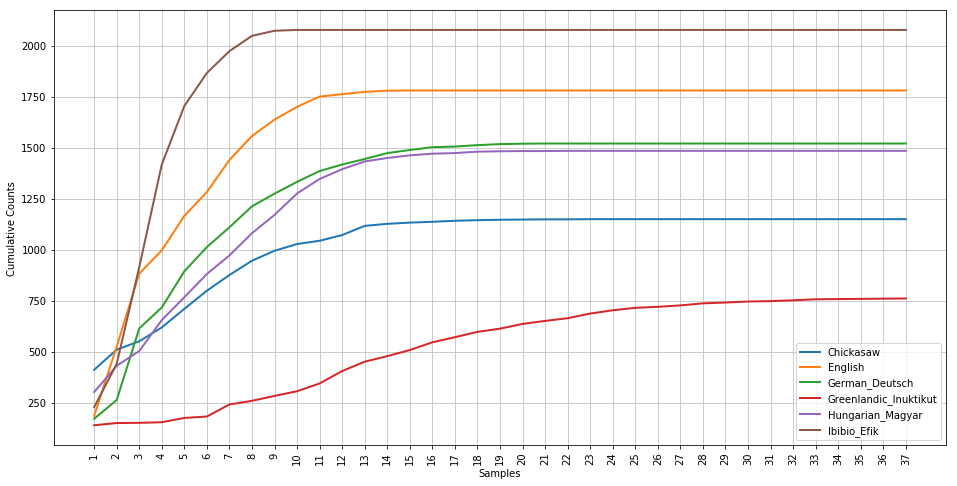

In [38]:
from nltk.corpus import udhr

languages = ['Chickasaw', 'English', 'German_Deutsch', 'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']

cfd = nltk.ConditionalFreqDist(
           (lang, len(word))
           for lang in languages
           for word in udhr.words(lang + '-Latin1'))

cfd.plot(cumulative=True)

## WordNet

WordNet is a semantically-oriented dictionary of English, similar to a traditional thesaurus but with a richer structure. NLTK includes the English WordNet, with 155,287 words and 117,659 synonym sets. We'll begin by looking at synonyms and how they are accessed in WordNet.

### Senses and Synonyms
Consider the sentence in (1a). If we replace the word motorcar in (1a) by automobile, to get (1b), the meaning of the sentence stays pretty much the same:
		
(1)a. Benz is credited with the invention of the motorcar.

(1)b. Benz is credited with the invention of the automobile.

Since everything else in the sentence has remained unchanged, we can conclude that the words motorcar and automobile have the same meaning, i.e. they are synonyms. We can explore these words with the help of WordNet:

In [39]:
from nltk.corpus import wordnet as wn

In [40]:
wn.synsets('motorcar')

[Synset('car.n.01')]

Thus, motorcar has just one possible meaning and it is identified as car.n.01, the first noun sense of car. The entity car.n.01 is called a synset, or "synonym set", a collection of synonymous words (or "lemmas"):

In [41]:
wn.synset('car.n.01').lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

Each word of a synset can have several meanings, e.g., car can also signify a train carriage, a gondola, or an elevator car. However, we are only interested in the single meaning that is common to all words of the above synset. Synsets also come with a prose definition and some example sentences:

In [42]:
wn.synset('car.n.01').definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [43]:
wn.synset('car.n.01').examples()

['he needs a car to get to work']

Although definitions help humans to understand the intended meaning of a synset, the words of the synset are often more useful for our programs. To eliminate ambiguity, we will identify these words as car.n.01.automobile,  car.n.01.motorcar, and so on. This pairing of a synset with a word is called a lemma. We can get all the lemmas for a given synset [1], look up a particular lemma [2], get the synset corresponding to a lemma [3], and get the "name" of a lemma [4]:

In [44]:
#[1]
wn.synset('car.n.01').lemmas()

[Lemma('car.n.01.car'),
 Lemma('car.n.01.auto'),
 Lemma('car.n.01.automobile'),
 Lemma('car.n.01.machine'),
 Lemma('car.n.01.motorcar')]

In [45]:
#[2]
wn.lemma('car.n.01.automobile')

Lemma('car.n.01.automobile')

In [46]:
#[3]
wn.lemma('car.n.01.automobile').synset()

Synset('car.n.01')

In [51]:
#[4]
wn.lemma('car.n.01.automobile').name()

'automobile'

Unlike the word motorcar, which is unambiguous and has one synset, the word car is ambiguous, having five synsets:

In [48]:
wn.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [49]:
for synset in wn.synsets('car'):
    print(synset.lemma_names())

['car', 'auto', 'automobile', 'machine', 'motorcar']
['car', 'railcar', 'railway_car', 'railroad_car']
['car', 'gondola']
['car', 'elevator_car']
['cable_car', 'car']


In [52]:
# For convenience, we can access all the lemmas involving the word car as follows.
wn.lemmas('car')

[Lemma('car.n.01.car'),
 Lemma('car.n.02.car'),
 Lemma('car.n.03.car'),
 Lemma('car.n.04.car'),
 Lemma('cable_car.n.01.car')]